In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
parkinson = pd.read_csv('Parkinsson.csv')
df = parkinson.copy()
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [3]:
def check_df(dataframe,head =5):
    print("****************SHAPE****************")
    print(dataframe.shape)
    print("****************DTYPES****************")
    print(dataframe.dtypes)    
    print("****************HEAD****************")
    print(dataframe.head(head))
    print("****************Tail****************")
    print(dataframe.tail(head))
    print("****************NA****************")
    print(dataframe.isnull().sum())
    print("****************INFO****************")
    print(dataframe.info())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

****************SHAPE****************
(195, 24)
****************DTYPES****************
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object
****************HEAD****************
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400    

C:\Users\Enes\AppData\Local\Temp\ipykernel_22888\4177874474.py:15: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [4]:
df.columns = [col.lower() for col in df.columns]

In [5]:
df.drop("name",axis=1,inplace=True)
df.head()

mdvp:fo(hz)  mdvp:fhi(hz)  mdvp:flo(hz)  mdvp:jitter(%)  mdvp:jitter(abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   mdvp:rap  mdvp:ppq  jitter:ddp  mdvp:shimmer  mdvp:shimmer(db)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   shimmer:dda      nhr     hnr  status      rpde       dfa   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        d2       ppe  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

In [6]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    #cat cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes=='0']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique()<cat_th and  dataframe[col].dtypes!='0']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>car_th and dataframe[col].dtypes=='0']
    cat_cols = num_but_cat+cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    #num cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes!='0']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols,num_cols,cat_but_car =grab_col_names(df)

Observations: 195
Variables: 23
cat_cols: 1
num_cols: 22
cat_but_car: 0
num_but_cat: 1


In [8]:
cat_cols

['status']

In [9]:
num_cols

['mdvp:fo(hz)',
 'mdvp:fhi(hz)',
 'mdvp:flo(hz)',
 'mdvp:jitter(%)',
 'mdvp:jitter(abs)',
 'mdvp:rap',
 'mdvp:ppq',
 'jitter:ddp',
 'mdvp:shimmer',
 'mdvp:shimmer(db)',
 'shimmer:apq3',
 'shimmer:apq5',
 'mdvp:apq',
 'shimmer:dda',
 'nhr',
 'hnr',
 'rpde',
 'dfa',
 'spread1',
 'spread2',
 'd2',
 'ppe']

In [10]:
#kategorik degisken analizi
def cat_summary(dataframe,col_name):
    display(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                      "Ratio": 100*dataframe[col_name].value_counts()/len(dataframe)
                      }))
    
for col in cat_cols:
    cat_summary(df, col)
    print("")

status      Ratio
1     147  75.384615
0      48  24.615385

count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: mdvp:fo(hz), dtype: float64


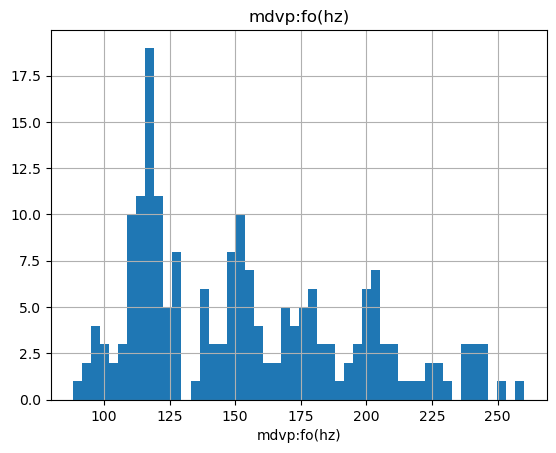

#####################################
count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: mdvp:fhi(hz), dtype: float64


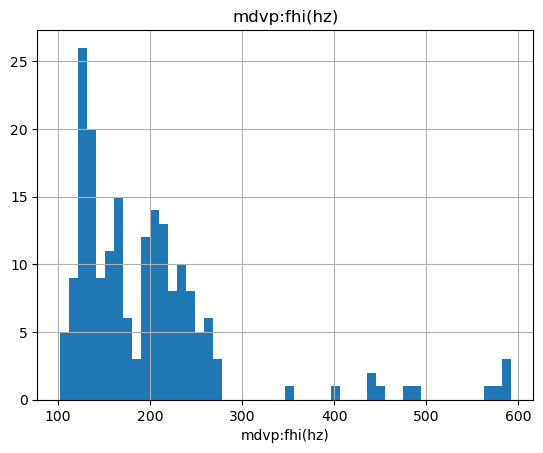

#####################################
count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: mdvp:flo(hz), dtype: float64


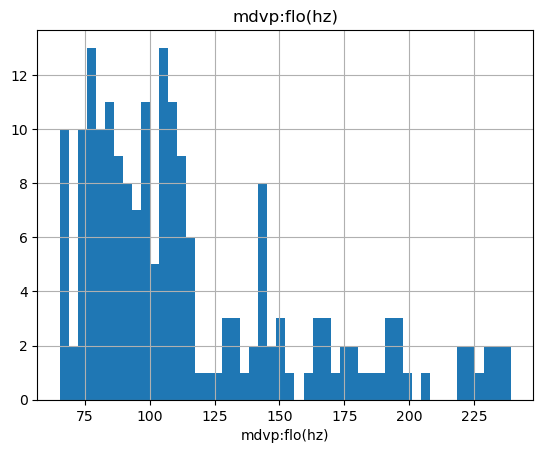

#####################################
count    195.000000
mean       0.006220
std        0.004848
min        0.001680
25%        0.003460
50%        0.004940
75%        0.007365
max        0.033160
Name: mdvp:jitter(%), dtype: float64


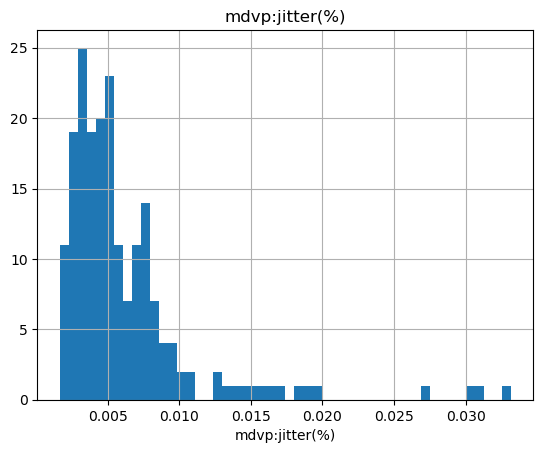

#####################################
count    195.000000
mean       0.000044
std        0.000035
min        0.000007
25%        0.000020
50%        0.000030
75%        0.000060
max        0.000260
Name: mdvp:jitter(abs), dtype: float64


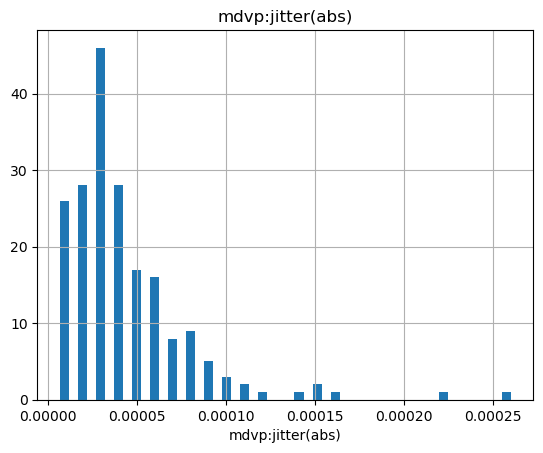

#####################################
count    195.000000
mean       0.003306
std        0.002968
min        0.000680
25%        0.001660
50%        0.002500
75%        0.003835
max        0.021440
Name: mdvp:rap, dtype: float64


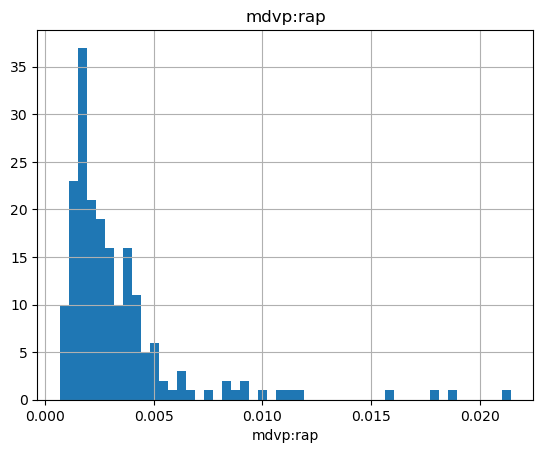

#####################################
count    195.000000
mean       0.003446
std        0.002759
min        0.000920
25%        0.001860
50%        0.002690
75%        0.003955
max        0.019580
Name: mdvp:ppq, dtype: float64


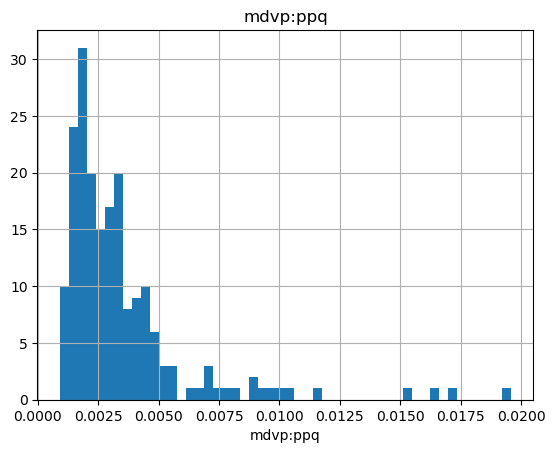

#####################################
count    195.000000
mean       0.009920
std        0.008903
min        0.002040
25%        0.004985
50%        0.007490
75%        0.011505
max        0.064330
Name: jitter:ddp, dtype: float64


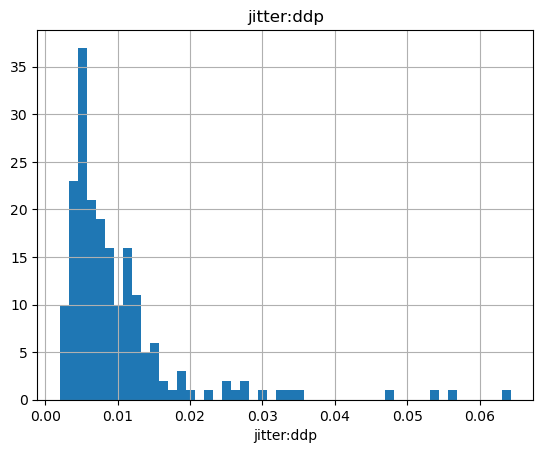

#####################################
count    195.000000
mean       0.029709
std        0.018857
min        0.009540
25%        0.016505
50%        0.022970
75%        0.037885
max        0.119080
Name: mdvp:shimmer, dtype: float64


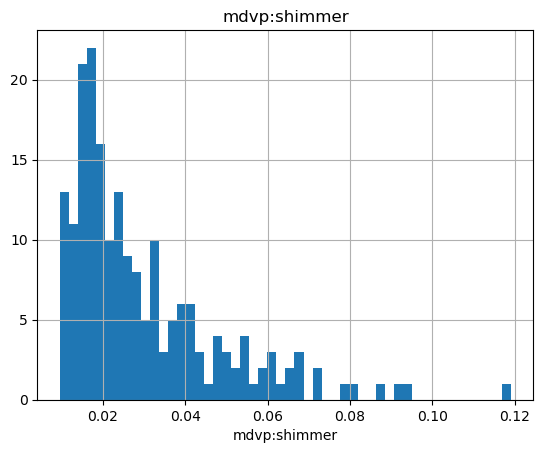

#####################################
count    195.000000
mean       0.282251
std        0.194877
min        0.085000
25%        0.148500
50%        0.221000
75%        0.350000
max        1.302000
Name: mdvp:shimmer(db), dtype: float64


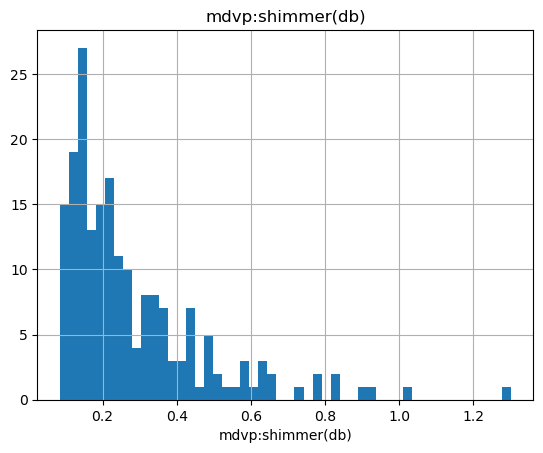

#####################################
count    195.000000
mean       0.015664
std        0.010153
min        0.004550
25%        0.008245
50%        0.012790
75%        0.020265
max        0.056470
Name: shimmer:apq3, dtype: float64


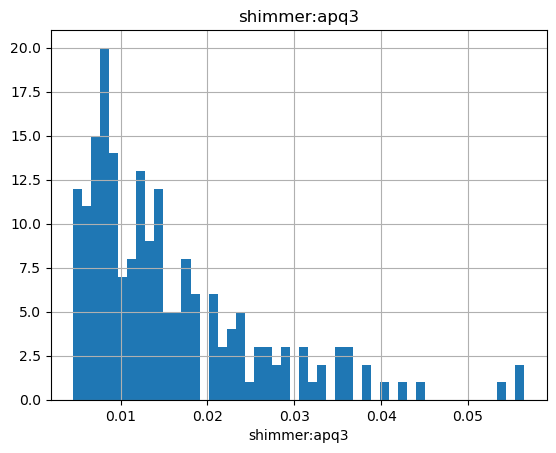

#####################################
count    195.000000
mean       0.017878
std        0.012024
min        0.005700
25%        0.009580
50%        0.013470
75%        0.022380
max        0.079400
Name: shimmer:apq5, dtype: float64


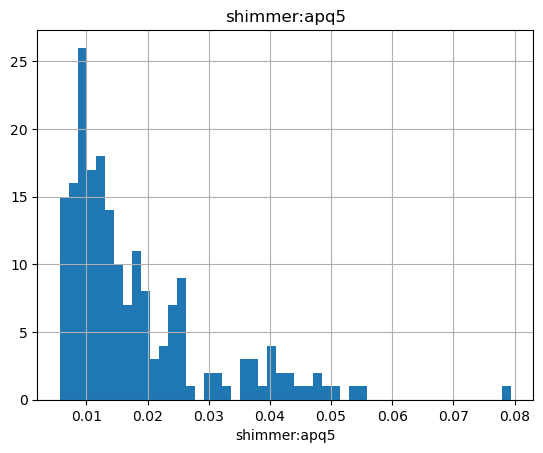

#####################################
count    195.000000
mean       0.024081
std        0.016947
min        0.007190
25%        0.013080
50%        0.018260
75%        0.029400
max        0.137780
Name: mdvp:apq, dtype: float64


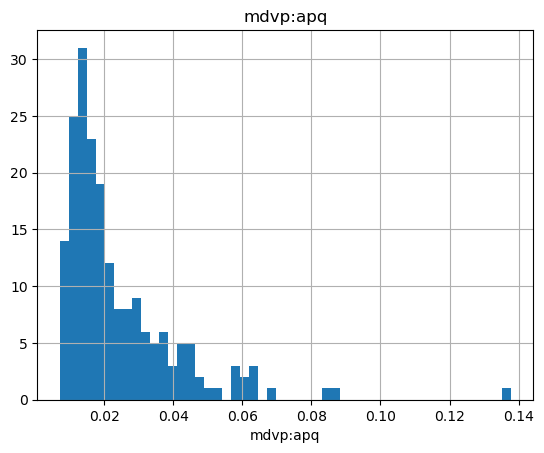

#####################################
count    195.000000
mean       0.046993
std        0.030459
min        0.013640
25%        0.024735
50%        0.038360
75%        0.060795
max        0.169420
Name: shimmer:dda, dtype: float64


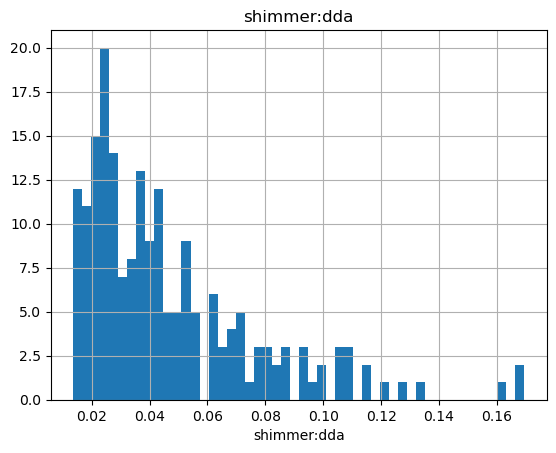

#####################################
count    195.000000
mean       0.024847
std        0.040418
min        0.000650
25%        0.005925
50%        0.011660
75%        0.025640
max        0.314820
Name: nhr, dtype: float64


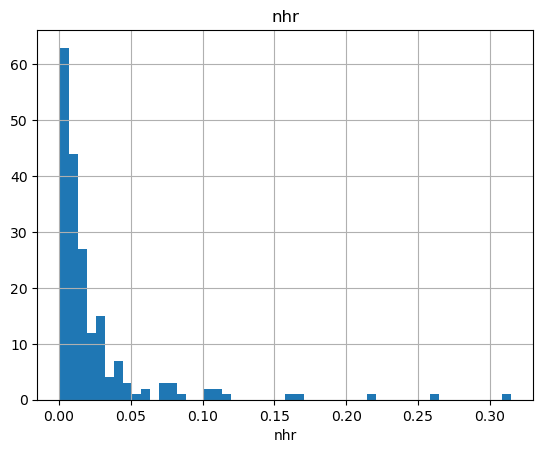

#####################################
count    195.000000
mean      21.885974
std        4.425764
min        8.441000
25%       19.198000
50%       22.085000
75%       25.075500
max       33.047000
Name: hnr, dtype: float64


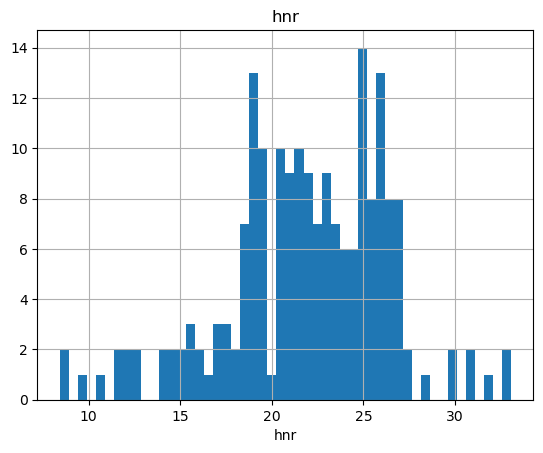

#####################################
count    195.000000
mean       0.498536
std        0.103942
min        0.256570
25%        0.421306
50%        0.495954
75%        0.587562
max        0.685151
Name: rpde, dtype: float64


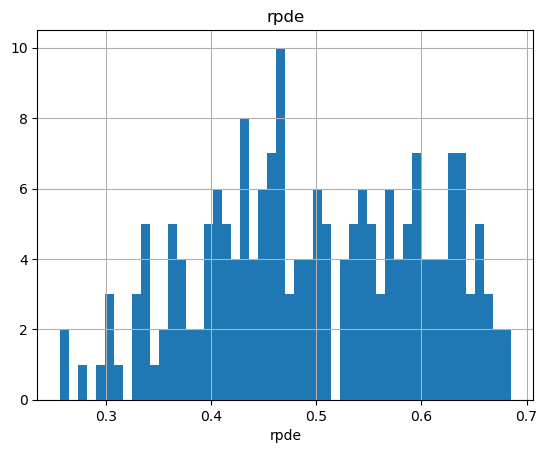

#####################################
count    195.000000
mean       0.718099
std        0.055336
min        0.574282
25%        0.674758
50%        0.722254
75%        0.761881
max        0.825288
Name: dfa, dtype: float64


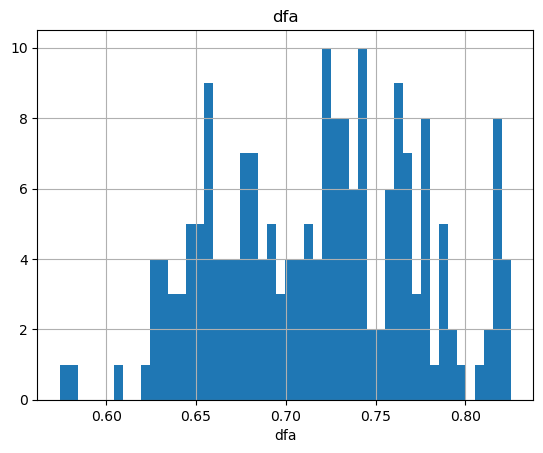

#####################################
count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
25%       -6.450096
50%       -5.720868
75%       -5.046192
max       -2.434031
Name: spread1, dtype: float64


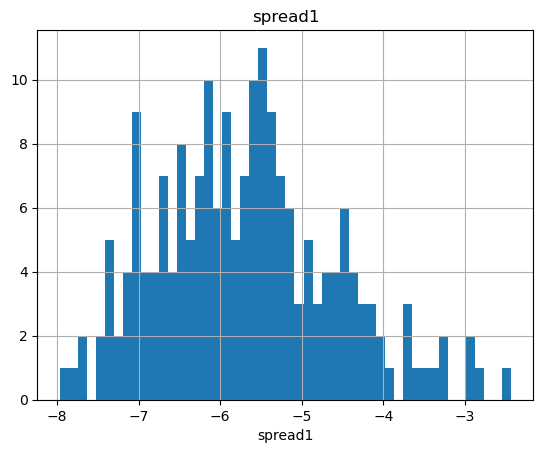

#####################################
count    195.000000
mean       0.226510
std        0.083406
min        0.006274
25%        0.174351
50%        0.218885
75%        0.279234
max        0.450493
Name: spread2, dtype: float64


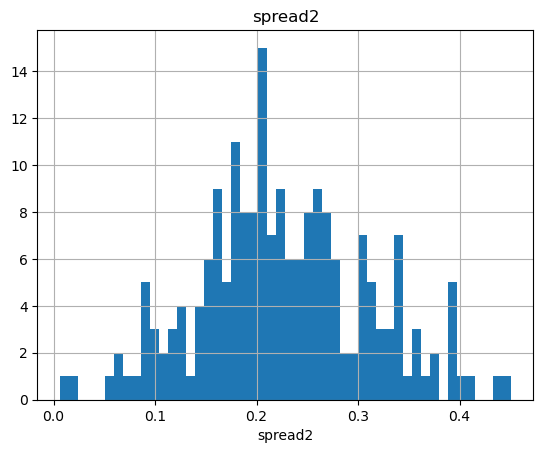

#####################################
count    195.000000
mean       2.381826
std        0.382799
min        1.423287
25%        2.099125
50%        2.361532
75%        2.636456
max        3.671155
Name: d2, dtype: float64


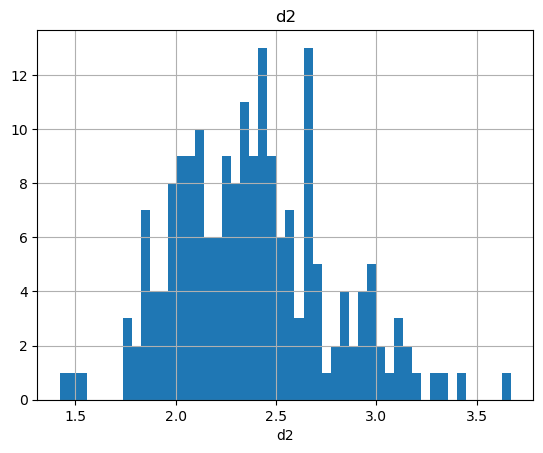

#####################################
count    195.000000
mean       0.206552
std        0.090119
min        0.044539
25%        0.137451
50%        0.194052
75%        0.252980
max        0.527367
Name: ppe, dtype: float64


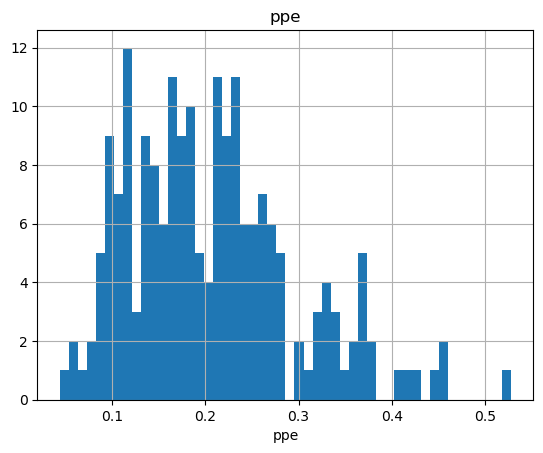

#####################################


In [11]:
def num_summary(dataframe,col):
    print(dataframe[col].describe().T)
    dataframe[col].hist(bins=50)
    plt.xlabel(col)
    plt.title(col)
    plt.show(block=True)
    print("#####################################")

    
for col in num_cols:
    num_summary(df,col)

In [12]:
#Analysis of Numerical Variables on the Target Variable (Numerik Değişkenlerin Hedef Değişkene Göre Analizi

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, df["status"], col)

        mdvp:fo(hz)
status             
0        181.937771
1        145.180762


        mdvp:fhi(hz)
status              
0         223.636750
1         188.441463


        mdvp:flo(hz)
status              
0         145.207292
1         106.893558


        mdvp:jitter(%)
status                
0             0.003866
1             0.006989


        mdvp:jitter(abs)
status                  
0               0.000023
1               0.000051


        mdvp:rap
status          
0       0.001925
1       0.003757


        mdvp:ppq
status          
0       0.002056
1       0.003900


        jitter:ddp
status            
0         0.005776
1         0.011273


        mdvp:shimmer
status              
0           0.017615
1           0.033658


        mdvp:shimmer(db)
status                  
0               0.162958
1               0.321204


        shimmer:apq3
status              
0           0.009504
1           0.017676


        shimmer:apq5
status              
0           0.01

In [13]:
#status kolonunu sona alma
sutunlar = list(df.columns) 
sutunlar.remove('status')
sutunlar.append('status')

df = df[sutunlar]
df.head()

mdvp:fo(hz)  mdvp:fhi(hz)  mdvp:flo(hz)  mdvp:jitter(%)  mdvp:jitter(abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   mdvp:rap  mdvp:ppq  jitter:ddp  mdvp:shimmer  mdvp:shimmer(db)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   shimmer:dda      nhr     hnr      rpde       dfa   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   

         d2       ppe  status  
0  2.301442  0.284654       1  
1  2.486855  0.368674       1  
2  2.342259  0.332634       1  
3  2.405554  0.368975       1  
4  2.332180  0.410335       1  

[5 rows x 23 columns]

In [14]:
#sutunlari numaralandir

yeni_sutunlar = {sutun: i for i, sutun in enumerate(df.columns)}
df = df.rename(columns=yeni_sutunlar)
df.head()

0        1        2        3        4        5        6        7   \
0  119.992  157.302   74.997  0.00784  0.00007  0.00370  0.00554  0.01109   
1  122.400  148.650  113.819  0.00968  0.00008  0.00465  0.00696  0.01394   
2  116.682  131.111  111.555  0.01050  0.00009  0.00544  0.00781  0.01633   
3  116.676  137.871  111.366  0.00997  0.00009  0.00502  0.00698  0.01505   
4  116.014  141.781  110.655  0.01284  0.00011  0.00655  0.00908  0.01966   

        8      9   ...       13       14      15        16        17  \
0  0.04374  0.426  ...  0.06545  0.02211  21.033  0.414783  0.815285   
1  0.06134  0.626  ...  0.09403  0.01929  19.085  0.458359  0.819521   
2  0.05233  0.482  ...  0.08270  0.01309  20.651  0.429895  0.825288   
3  0.05492  0.517  ...  0.08771  0.01353  20.644  0.434969  0.819235   
4  0.06425  0.584  ...  0.10470  0.01767  19.649  0.417356  0.823484   

         18        19        20        21  22  
0 -4.813031  0.266482  2.301442  0.284654   1  
1 -4.075192  0.335590  2.486855  0.368674   1  
2 -4.443179  0.311173  2.342259  0.332634   1  
3 -4.117501  0.334147  2.405554  0.368975   1  
4 -3.747787  0.234513  2.332180  0.410335   1  

[5 rows x 23 columns]

In [15]:
#outlier
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [16]:
for col in range(22):
    print(col, check_outlier(df, col))

0 False
1 False
2 False
3 False
4 True
5 True
6 False
7 True
8 False
9 False
10 False
11 False
12 True
13 False
14 True
15 False
16 False
17 False
18 False
19 False
20 False
21 False


In [17]:
#outlier
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in range(22):
    replace_with_thresholds(df, col)

In [18]:
for col in range(22):
    print(col, check_outlier(df, col))

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False


In [19]:
#col means
meanList = []
for col in range(22):
    meanList.append(df[col].mean())
meanList

[154.22864102564102,
 197.10491794871797,
 116.32463076923077,
 0.006220461538461538,
 4.3830769230769236e-05,
 0.0033001179487179492,
 0.003446358974358974,
 0.009901058974358974,
 0.0297091282051282,
 0.2822512820512821,
 0.015664153846153845,
 0.017878256410256407,
 0.024044789743589746,
 0.04699261538461539,
 0.024224082051282046,
 21.885974358974355,
 0.4985355384615385,
 0.7180990461538461,
 -5.684396743589745,
 0.22651034871794873,
 2.3818260871794874,
 0.20655164102564103]

In [20]:
#ortalamadan büyük olanlar 1 küçük eşit olanlar 0 olarak ayarlanmıştır

column_means = df.iloc[:, :-1].mean()
for column in df.columns[:-1]:  # Son sütunu atlıyoruz
    df[column] = np.where(df[column] > column_means[column], 1, 0)
    

In [21]:
path = r'C:\Users\Enes\Desktop\GiniPython\Parkinson.txt'

#export DataFrame to text file
with open(path, 'a') as f:
    df_string = df.to_string(header=False, index=False)
    f.write(df_string)

In [22]:
df.head()

0   1   2   3   4   5   6   7   8   9   ...  13  14  15  16  17  18  19  \
0   0   0   0   1   1   1   1   1   1   1  ...   1   0   0   0   1   1   1   
1   0   0   0   1   1   1   1   1   1   1  ...   1   0   0   0   1   1   1   
2   0   0   0   1   1   1   1   1   1   1  ...   1   0   0   0   1   1   1   
3   0   0   0   1   1   1   1   1   1   1  ...   1   0   0   0   1   1   1   
4   0   0   0   1   1   1   1   1   1   1  ...   1   0   0   0   1   1   1   

   20  21  22  
0   0   1   1  
1   1   1   1  
2   0   1   1  
3   1   1   1  
4   0   1   1  

[5 rows x 23 columns]